In [2]:
import os

# Get the current working directory to check the base path
current_working_directory = os.getcwd()
current_working_directory

'c:\\Users\\Bruger\\Documents\\Thesis\\Road-Anomaly-Detector\\road_anomaly_detector\\main\\calibration\\Placement'

Image loaded successfully


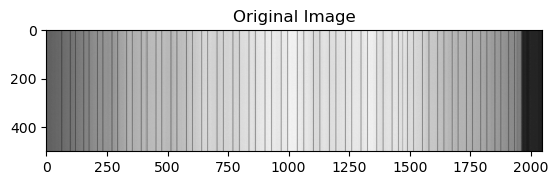

In [34]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('testimage.png', cv2.IMREAD_GRAYSCALE)
if image is not None:
    print("Image loaded successfully")
else:
    print("Image loading failed")


# Step 1: Show the Original Image
plt.figure()
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.show()

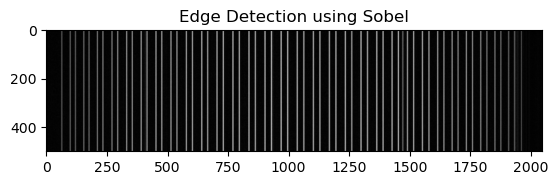

In [10]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
edges = cv2.magnitude(sobel_x, sobel_y)
plt.figure()
plt.title("Edge Detection using Sobel")
plt.imshow(edges, cmap='gray')
plt.show()

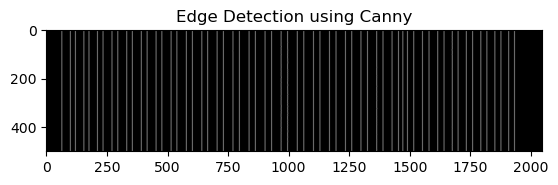

In [28]:
low_threshold = 50
high_threshold = 180
edges = cv2.Canny(image, low_threshold, high_threshold)
plt.figure()
plt.title("Edge Detection using Canny")
plt.imshow(edges, cmap='gray')
plt.show()

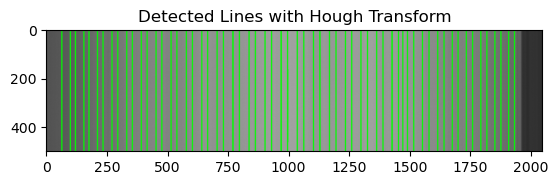

In [29]:
# Step 3: Hough Line Transform on Canny edges
threshold = 50  # Number of intersecting points to detect a line
min_line_length = 10  # Minimum length of line to detect
max_line_gap = 20  # Maximum gap between line segments
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=threshold,
                        minLineLength=min_line_length, maxLineGap=max_line_gap)

# Step 4: Visualize detected lines
line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show the result with lines overlaid on the original image
plt.figure()
plt.title("Detected Lines with Hough Transform")
plt.imshow(line_image)
plt.show()

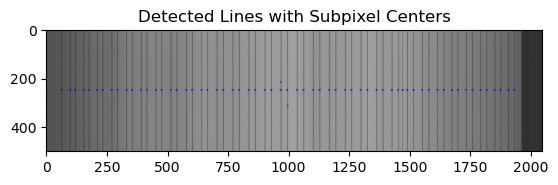

Subpixel Centers of Vertical Lines (x, y):
x: 838.717453798, y: 249.500000000
x: 1455.695577889, y: 249.500000000
x: 1579.216174671, y: 249.500000000
x: 1197.723639333, y: 249.500000000
x: 641.243528210, y: 249.500000000
x: 706.681056139, y: 249.500000000
x: 1552.165102206, y: 249.500000000
x: 1363.085727784, y: 249.500000000
x: 175.183770468, y: 249.500000000
x: 417.661135921, y: 249.500000000
x: 1677.706807465, y: 249.500000000
x: 100.694598431, y: 249.500000000
x: 1675.280279883, y: 251.000000000
x: 1735.535377036, y: 249.500000000
x: 1195.248489339, y: 249.500000000
x: 454.688106017, y: 249.500000000
x: 294.279388571, y: 249.500000000
x: 1429.744127537, y: 249.500000000
x: 354.230779124, y: 249.500000000
x: 1262.636274785, y: 249.500000000
x: 772.766107749, y: 249.500000000
x: 995.087128002, y: 249.500000000
x: 769.057256445, y: 249.500000000
x: 602.104321425, y: 249.500000000
x: 1851.169653411, y: 249.500000000
x: 356.650026019, y: 249.500000000
x: 1260.172161007, y: 249.500000000

In [41]:
# Prepare image to display lines with subpixel centers
line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
subpixel_centers = []

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        
        # Check if the line is vertical (or close to vertical)
        if abs(x2 - x1) < 5:
            # Extract a region around the line in the x-direction
            region = image[min(y1, y2):max(y1, y2), max(0, x1 - 3):min(image.shape[1], x1 + 3)]
            
            # Compute the intensity profile in the x-direction by summing over y
            x_profile = np.sum(region, axis=0)
            
            # Find the subpixel center in the x-direction using a weighted average approach
            # This approach provides a 0.1-pixel accuracy by leveraging intensity values
            x_indices = np.arange(len(x_profile))
            weighted_sum = np.sum(x_indices * x_profile)
            sum_profile = np.sum(x_profile)
            
            if sum_profile > 0:
                subpixel_x = x1 + (weighted_sum / sum_profile - (len(x_profile) / 2))
                subpixel_centers.append((subpixel_x, (y1 + y2) / 2))
                
                # Draw the subpixel center on the output image
                cv2.circle(line_image, (int(subpixel_x), int((y1 + y2) / 2)), 3, (0, 0, 255), -1)

# Step 4: Display Results
plt.figure()
plt.title("Detected Lines with Subpixel Centers")
plt.imshow(line_image)
plt.show()

# Optional: Print subpixel center coordinates for verification
print("Subpixel Centers of Vertical Lines (x, y):")
for center in subpixel_centers:
    print(f"x: {center[0]:.9f}, y: {center[1]:.9f}")